# 16 - Representación de datos e ingeniería de características

![](images/1.png)

## Módulo 6 - Aprendizaje de máquina supervisado
### Profesor: M.Sc. Favio Vázquez

In [1]:
from imports import *

In [2]:
import os 
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
display(data.head(10))

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K
5,37,Private,Masters,Female,40,Exec-managerial,<=50K
6,49,Private,9th,Female,16,Other-service,<=50K
7,52,Self-emp-not-inc,HS-grad,Male,45,Exec-managerial,>50K
8,31,Private,Masters,Female,50,Prof-specialty,>50K
9,42,Private,Bachelors,Male,40,Exec-managerial,>50K


## Datos categóricos

### One-Hot-Enconding (Dummy variables)

In [3]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [4]:
data.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [5]:
data.columns

Index(['age', 'workclass', 'education', 'gender', 'hours-per-week',
       'occupation', 'income'],
      dtype='object')

In [6]:
data_dummies = pd.get_dummies(data)

In [7]:
data_dummies.columns

Index(['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'gender_ Female', 'gender_ Male',
       'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
   

In [8]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,...,0,0,1,0
1,50,13,0,0,...,0,0,1,0
2,38,40,0,0,...,0,0,1,0
3,53,40,0,0,...,0,0,1,0
4,28,40,0,0,...,0,0,1,0


In [9]:
data_dummies.dtypes

age                              int64
hours-per-week                   int64
workclass_ ?                     uint8
workclass_ Federal-gov           uint8
workclass_ Local-gov             uint8
workclass_ Never-worked          uint8
workclass_ Private               uint8
workclass_ Self-emp-inc          uint8
workclass_ Self-emp-not-inc      uint8
workclass_ State-gov             uint8
workclass_ Without-pay           uint8
education_ 10th                  uint8
education_ 11th                  uint8
education_ 12th                  uint8
education_ 1st-4th               uint8
education_ 5th-6th               uint8
education_ 7th-8th               uint8
education_ 9th                   uint8
education_ Assoc-acdm            uint8
education_ Assoc-voc             uint8
education_ Bachelors             uint8
education_ Doctorate             uint8
education_ HS-grad               uint8
education_ Masters               uint8
education_ Preschool             uint8
education_ Prof-school   

In [10]:
features = data_dummies.loc[:, "age": "occupation_ Transport-moving"]

In [11]:
X = features.values
y = data_dummies["income_ >50K"].values

In [12]:
X

array([[39, 40,  0, ...,  0,  0,  0],
       [50, 13,  0, ...,  0,  0,  0],
       [38, 40,  0, ...,  0,  0,  0],
       ...,
       [58, 40,  0, ...,  0,  0,  0],
       [22, 20,  0, ...,  0,  0,  0],
       [52, 40,  0, ...,  0,  0,  0]], dtype=int64)

In [13]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [16]:
logreg = LogisticRegression()

In [17]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [18]:
logreg.score(X_test,y_test)

0.8067804937968308

## Datos numéricos que codifican categorías

In [19]:
demo_df = pd.DataFrame({"Integer Feature": [0,1,2,1],
                    "Categorical Feature": ["arroz", "pollo", "carne", "pollo"]})

In [20]:
demo_df

,Integer Feature,Categorical Feature
0,0,arroz
1,1,pollo
2,2,carne
3,1,pollo


In [21]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_arroz,Categorical Feature_carne,Categorical Feature_pollo
0,0,1,0,0
1,1,0,0,1
2,2,0,1,0
3,1,0,0,1


In [22]:
demo_df["Integer Feature"] = demo_df["Integer Feature"].astype(str)

In [23]:
pd.get_dummies(demo_df)

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_arroz,Categorical Feature_carne,Categorical Feature_pollo
0,1,0,0,1,0,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,0,0,1


## Castear a category

In [24]:
demo_df = pd.DataFrame({"Integer Feature": [0,1,2,1],
                    "Categorical Feature": ["arroz", "pollo", "carne", "pollo"]})

In [25]:
demo_df


,Integer Feature,Categorical Feature
0,0,arroz
1,1,pollo
2,2,carne
3,1,pollo


In [26]:
demo_df.dtypes

Integer Feature         int64
Categorical Feature    object
dtype: object

In [27]:
demo_df["Integer Feature"] = demo_df["Integer Feature"].astype("category")

In [28]:
demo_df.dtypes

Integer Feature        category
Categorical Feature      object
dtype: object

In [29]:
demo_df

,Integer Feature,Categorical Feature
0,0,arroz
1,1,pollo
2,2,carne
3,1,pollo


## Binning (discretización), modelos lineales y árboles

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [31]:
X,y = mglearn.datasets.make_wave(n_samples=100)

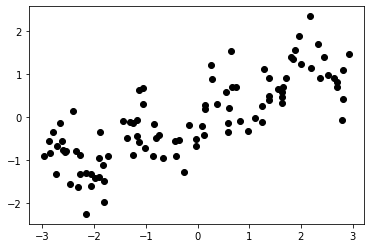

In [32]:
plt.plot(X[:,0], y, "o", c="k")

In [33]:
line = np.linspace(-3,3, 1000, endpoint=False).reshape(-1,1)

In [34]:
dt = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
lr = LinearRegression().fit(X,y)

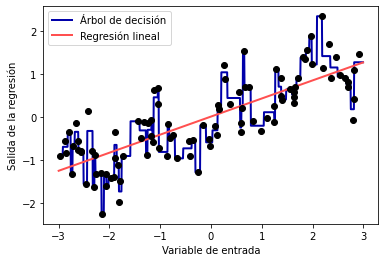

In [35]:
plt.plot(line, dt.predict(line), label="Árbol de decisión")
plt.plot(line, lr.predict(line), label="Regresión lineal")
plt.plot(X[:,0], y, "o", c="k")
plt.ylabel("Salida de la regresión")
plt.xlabel("Variable de entrada")
plt.legend(loc="best")
plt.show()

In [36]:
bins = np.linspace(-3,3,11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [37]:
bin_data = np.digitize(X, bins=bins)

In [38]:
X[:5]

array([[-0.753],
       [ 2.704],
       [ 1.392],
       [ 0.592],
       [-2.064]])

In [39]:
bin_data[:5]

array([[ 4],
       [10],
       [ 8],
       [ 6],
       [ 2]], dtype=int64)

In [40]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(bin_data)
X_binned = encoder.transform(bin_data)

In [41]:
X_binned[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [42]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

In [43]:
line_binned

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

Text(0.5, 0, 'Variable de entrada')

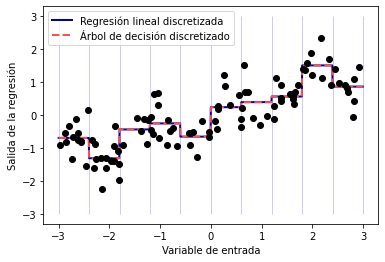

In [44]:
lr = LinearRegression().fit(X_binned,y)
dt = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line,lr.predict(line_binned), 
         label="Regresión lineal discretizada")
plt.plot(line,dt.predict(line_binned), 
         label="Árbol de decisión discretizado", linestyle="dashed")
plt.plot(X[:,0], y, "o", c="k")
plt.vlines(bins,-3,3, linewidth=1, alpha=0.2)
plt.legend(loc="best")
plt.ylabel("Salida de la regresión")
plt.xlabel("Variable de entrada")

### Características polimoniales e interacciones

El binning nos permite expandir una variable continua. Otra forma de hacerlo es usar polinomios de las variables originales. Para una característica x, qusieramos considerar $x^2$, $x^3$, $x^4$, etc. Esto viene implementado en la función PolynomialFeatures del módulo de preprocesado de scikit-learn.

In [45]:
X[:4]

array([[-0.753],
       [ 2.704],
       [ 1.392],
       [ 0.592]])

In [46]:
from sklearn.preprocessing import PolynomialFeatures

# Crear un polinomio de rango 10
# Eliminaremos la opción include_bias porque agrega una característica
# que siempre es igual 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [47]:
X.shape

(100, 1)

In [48]:
X_poly.shape

(100, 10)

In [49]:
X[:5]

array([[-0.753],
       [ 2.704],
       [ 1.392],
       [ 0.592],
       [-2.064]])

In [50]:
X_poly[:5]

array([[   -0.753,     0.567,    -0.427,     0.321,    -0.242,     0.182,
           -0.137,     0.103,    -0.078,     0.058],
       [    2.704,     7.313,    19.777,    53.482,   144.632,   391.125,
         1057.714,  2860.36 ,  7735.232, 20918.278],
       [    1.392,     1.938,     2.697,     3.754,     5.226,     7.274,
           10.125,    14.094,    19.618,    27.307],
       [    0.592,     0.35 ,     0.207,     0.123,     0.073,     0.043,
            0.025,     0.015,     0.009,     0.005],
       [   -2.064,     4.26 ,    -8.791,    18.144,   -37.448,    77.289,
         -159.516,   329.222,  -679.478,  1402.367]])

In [51]:
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

Text(0.5, 0, 'Variable de entrada')

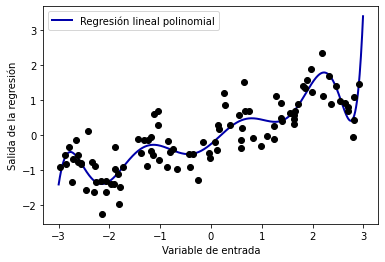

In [52]:
lr = LinearRegression().fit(X_poly,y)
line_poly = poly.transform(line)
plt.plot(line, lr.predict(line_poly), label="Regresión lineal polinomial")
plt.plot(X[:,0], y, "o", c="k")
plt.legend(loc="best")
plt.ylabel("Salida de la regresión")
plt.xlabel("Variable de entrada")

Text(0.5, 0, 'Variable de entrada')

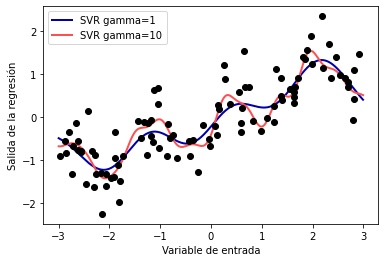

In [53]:
from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label="SVR gamma={}".format(gamma))
plt.plot(X[:,0], y, "o", c="k")
plt.legend(loc="best")
plt.ylabel("Salida de la regresión")
plt.xlabel("Variable de entrada")

## Ejemplo

In [54]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [55]:
boston = load_boston()

# Método de la exclusión
X_train, X_test, y_train, y_test = train_test_split(boston.data,
                                                    boston.target,
                                                    random_state=0)

In [56]:
# reescalamimento

from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))
print("\n")
print(scaler.data_max_)
print("\n")
print(scaler.transform(data))

MinMaxScaler()


[ 1. 18.]


[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


In [57]:
# reescalar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# Encontrar características polimoniales e interacciones hasta grado 2
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [59]:
X_train.shape

(379, 13)

In [60]:
X_train_poly.shape

(379, 105)

In [61]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x9^2',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x10^2',
 'x10 x11',
 'x10 x1

In [62]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled,y_train)
print("Score sin interacciones {:.3f}".format(ridge.score(X_test_scaled,
                                                         y_test)))
ridge = Ridge().fit(X_train_poly,y_train)
print("Score con interacciones {:.3f}".format(ridge.score(X_test_poly,
                                                         y_test)))

Score sin interacciones 0.621
Score con interacciones 0.753


In [63]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled,y_train)
print("Score sin interacciones {:.3f}".format(rf.score(X_test_scaled,
                                                         y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly,y_train)
print("Score con interacciones {:.3f}".format(rf.score(X_test_poly,
                                                         y_test)))

Score sin interacciones 0.806
Score con interacciones 0.760


## Transformaciones no lineales univariadas

La mayoría de los modelos funcionan mejor cuando cada característica (y en regresión también el target) tienen una distribución cercana a la Gaussiana. Las transformaciones como el logaritmo o el exponencial nos permite transformar las distribuciones de las variables para que tengan una forma gaussiana.

In [64]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

In [65]:
X_org

array([[ 1.764,  0.4  ,  0.979],
       [ 2.241,  1.868, -0.977],
       [ 0.95 , -0.151, -0.103],
       ...,
       [-1.303,  0.467,  0.161],
       [ 0.32 ,  2.079, -0.907],
       [-0.192, -1.213, -0.081]])

In [66]:
w

array([ 1.593,  0.569, -0.114])

In [67]:
X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org,w)

In [68]:
X[:3]

array([[56, 18, 27],
       [81, 57,  3],
       [25,  9, 11]])

In [69]:
y[:3]

array([2.926, 4.744, 1.439])

In [70]:
np.bincount(X[:,0])

array([28, 38, 68, 48, 61, 59, 45, 56, 37, 40, 35, 34, 36, 26, 23, 26, 27,
       21, 23, 23, 18, 21, 10,  9, 17,  9,  7, 14, 12,  7,  3,  8,  4,  5,
        5,  3,  4,  2,  4,  1,  1,  3,  2,  5,  3,  8,  2,  5,  2,  1,  2,
        3,  3,  2,  2,  3,  3,  0,  1,  2,  1,  0,  0,  3,  1,  0,  0,  0,
        1,  3,  0,  1,  0,  2,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  2,
        2,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1], dtype=int64)

Text(0.5, 0, 'Valor')

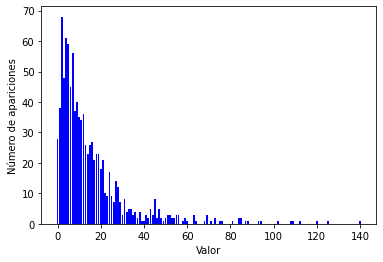

In [71]:
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color="b")
plt.ylabel("Número de apariciones")
plt.xlabel("Valor")

In [72]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
score = Ridge().fit(X_train,y_train).score(X_test,y_test)
print("Score del test: {:.3f}".format(score))

Score del test: 0.622


In [73]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Valor')

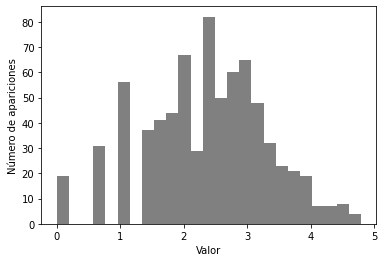

In [74]:
plt.hist(X_train_log[:,0], bins=25, color="gray")
plt.ylabel("Número de apariciones")
plt.xlabel("Valor")

In [75]:
score = Ridge().fit(X_train_log,y_train).score(X_test_log,y_test)
print("Score del test: {:.3f}".format(score))

Score del test: 0.875


Encontrar la transformación que funcione mejor para un dataset y un modelo no es obvio, parece hasta un arte. 

En modelos simples, es recomendado que los datos esten normalizados.